# 1 模型处理

In [3]:
from transformers import BertModel

model = BertModel.from_pretrained("bert-base-cased")


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

d:\programfiles\Anaconda\anaconda\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\14754\.cache\huggingface\hub\models--bert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## 保存模型


In [5]:
from transformers import AutoModel

model = AutoModel.from_pretrained("bert-base-cased")
model.save_pretrained("./models/bert-base-cased/")

d:\programfiles\Anaconda\anaconda\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a mode

# 2 分词器


## 按词切分


In [7]:
tokenized_text = "Jim Henson's a puppeteer".split()
print(tokenized_text)

['Jim', "Henson's", 'a', 'puppeteer']


## 按字符切分


## 按子词(subword)切分

是上面两个方法的集合版，也是目前最常用的。

## 加载宇保存分词器


In [8]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
tokenizer.save_pretrained("./models/bert-base-cased/")

d:\programfiles\Anaconda\anaconda\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

('./models/bert-base-cased/tokenizer_config.json',
 './models/bert-base-cased/special_tokens_map.json',
 './models/bert-base-cased/vocab.txt',
 './models/bert-base-cased/added_tokens.json')

In [9]:
# 一般情况下，我们应该使用AutoTokenizer来加载分词器
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokenizer.save_pretrained("./models/bert-base-cased/")

d:\programfiles\Anaconda\anaconda\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

('./models/bert-base-cased/tokenizer_config.json',
 './models/bert-base-cased/special_tokens_map.json',
 './models/bert-base-cased/vocab.txt',
 './models/bert-base-cased/added_tokens.json',
 './models/bert-base-cased/tokenizer.json')

## 编码与解码文本
文本解码：Encoding：
1. 分词：使用分词器将按某种策略将文本切分为tokens
2. 映射：将tokens转化为对应的Token IDs


In [1]:
# 使用BERT分词器来对文本进行分词

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple."
tokens = tokenizer.tokenize(sequence)

print(tokens)

d:\programfiles\Anaconda\anaconda\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple', '.']


In [2]:
# 使用convert_tokens_to_ids()将切分出的tokens转为对应的token IDs
ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)

[7993, 170, 13809, 23763, 2443, 1110, 3014, 119]


In [3]:
# 可以通过encode()将这两个步骤合并。
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple."
sequence_ids = tokenizer.encode(sequence)

print(sequence_ids)

d:\programfiles\Anaconda\anaconda\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 119, 102]


In [4]:
# 通常在实际使用的时候，是直接用分词器进行处理的：
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokenized_text = tokenizer("Using a Transformer network is simple.")
print(tokenized_text)

d:\programfiles\Anaconda\anaconda\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [5]:
# Decoding 过程
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)


decoded_string = tokenizer.decode([101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102])
print(decoded_string)

d:\programfiles\Anaconda\anaconda\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Using a transformer network is simple
[CLS] Using a Transformer network is simple [SEP]


## 处理多段文本
多段文本合成了一个batch作为输入。

即使只有一个样本，也需要作为一个batch。

In [3]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

tokens = tokenizer.tokenize(sequence)  # 分词  sequence -> tokens

print(f'tokens:{tokens}')

ids = tokenizer.convert_tokens_to_ids(tokens)  # 获取tokens的id

input_ids = torch.tensor([ids])
print(f'Input IDs:{input_ids}\n')

# print(model(tokens))   model 只能对input_ids进行推理。

output = model(input_ids)
print(f"Logits:{output.logits}\n")

tokens:['i', "'", 've', 'been', 'waiting', 'for', 'a', 'hugging', '##face', 'course', 'my', 'whole', 'life', '.']
Input IDs:tensor([[ 1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
          2026,  2878,  2166,  1012]])

Logits:tensor([[-2.7276,  2.8789]], grad_fn=<AddmmBackward0>)



In [6]:
# 直接使用分词器对文本进行处理的例子
import torch 
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 加载模型
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

# 定义输入文本
sequence = "I've been waiting for a HuggingFace course my whole life."

# 对文本进行分词处理
tokenized_inputs = tokenizer(sequence, return_tensors="pt")  # “pt”表示返回PyTorch张量

print(f'tokenizer_inputs: {tokenized_inputs.keys()}')

# 对分词后的输入进行模型预测
output = model(**tokenized_inputs)
print(output)
print(output.logits)




d:\programfiles\Anaconda\anaconda\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_inputs: dict_keys(['input_ids', 'attention_mask'])
SequenceClassifierOutput(loss=None, logits=tensor([[-1.5607,  1.6123]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor([[-1.5607,  1.6123]], grad_fn=<AddmmBackward0>)


# Padding 操作
Padding操作是为了解决：“batch中的文本有长有短，而输入的tensor必须是严格的二维矩阵，维度是（batch_size, sequence_length）”，因此，需要对短文本进行填充，将其填充成和长文本一样的长度。

In [7]:
# 分别尝试，将两段文本，以独立和batch的形式送入模型
import torch 
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1_ids = [[200, 200, 200]]
sequence2_ids = [[200, 200]]

batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id]
]

print(model(torch.tensor(sequence1_ids)).logits)    
print(model(torch.tensor(sequence2_ids)).logits)
print(model(torch.tensor(batched_ids)).logits)


d:\programfiles\Anaconda\anaconda\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)
tensor([[ 1.5694, -1.3895],
        [ 1.3374, -1.2163]], grad_fn=<AddmmBackward0>)


这里我们发现：

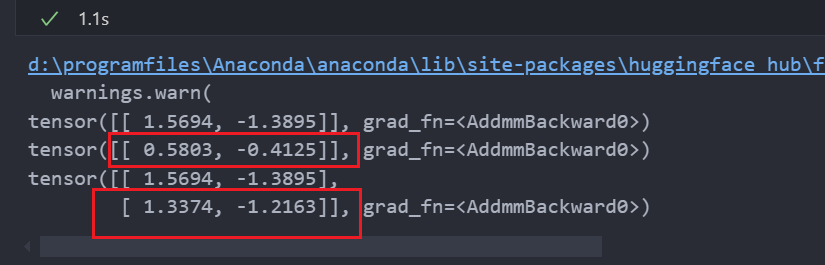

同样的文本，只是由于填充了padding，同时选择了是否以batch的形式进行输入，但输出结果却完全不同！

因为，模型默认会编码输入序列中的所有 token 以建模完整的上下文，因此这里会将填充的 padding token 也一同编码进去，从而生成不同的语义表示。

因此，需要使用Attention mask，来标记，哪些token是不需要参与计算的。

In [8]:
# Attention mask

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1_ids = [[200, 200, 200]]
sequence2_ids = [[200, 200]]

batch_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

attention_mask = [
    [1, 1, 1],
    [1, 1, 0],
]

print(model(torch.tensor(sequence1_ids)).logits)
print(model(torch.tensor(sequence2_ids)).logits)
outputs = model(
    torch.tensor(batch_ids),
    attention_mask=torch.tensor(attention_mask)
)
print(outputs.logits)


d:\programfiles\Anaconda\anaconda\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)
tensor([[ 1.5694, -1.3895],
        [ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)


# 结论
因此在进行tokenize的时候，我们尽可能直接用tokenize(sequence)


In [9]:
# 直接使用分词器
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

sequences = [
    "I've been waiting for a HuggingFace course my whole life.",
    "So have I!"
]

model_inputs = tokenizer(sequences)

print(model_inputs)

d:\programfiles\Anaconda\anaconda\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


{'input_ids': [[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], [101, 2061, 2031, 1045, 999, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}


In [10]:
# 使用Padding操作
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

sequences = [
    "I've been waiting for a HuggingFace course my whole life.",
    "So have I!"
]

model_inputs = tokenizer(sequences)

print(model_inputs)

model_inputs = tokenizer(sequences, padding="longest")

print(model_inputs)

model_inputs = tokenizer(sequences, padding="max_length")

print(model_inputs)

d:\programfiles\Anaconda\anaconda\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


{'input_ids': [[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], [101, 2061, 2031, 1045, 999, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}
{'input_ids': [[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], [101, 2061, 2031, 1045, 999, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}
{'input_ids': [[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# 截断操作
